# Actividad 03: Errores
# Benjamin Escobar Jaramillo CC 1001228411
---

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

###Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import factorial

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [ ]:
def taylorsin(x,tol,maxiter): #Esta funcion recibe: x (el argumento), la tolerancia, y un máximo de iteraciones.
  seno=0
  for i in range(maxiter):                   #Para que lo haga un "maxiter" veces
    seno+= (((-1)**i)/(math.factorial(2*i +1)))*x**(2*i+1)
    if abs(np.sin(x)-seno)<tol:             #Si la diferencia es menor que la tolerancia, eureka
      return seno
  return print(f"Maximas iteraciones alcanzadas, el valor podría encontrarse al rededor de {seno}") #Sino, nimodo!

In [ ]:
epsilon=np.finfo(np.float64).eps #Con esto haremos una pequeña prueba a continuación

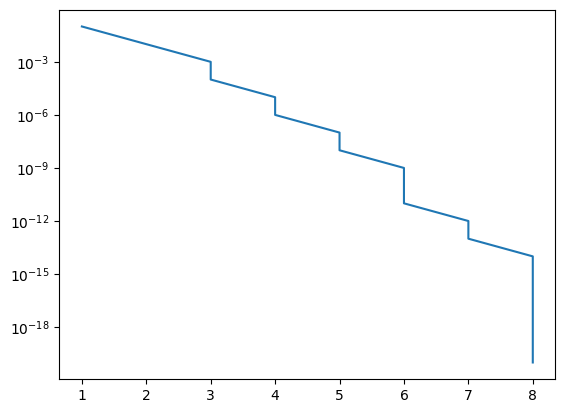

In [ ]:
#Comparemos el comportamiento de la serie, variando su tolerancia!

def taylorsintol(x,tol): #Ahora, solo recibe la x, y la tolerancia, y iterará hasta llegar a esta.
  i=0
  seno=0
  while True:
    seno+= (((-1)**i)/(math.factorial(2*i +1)))*x**(2*i+1)
    i+=1
    if abs(np.sin(x)-seno)<tol:
      break
    else:
      continue
  return i                    # y devuelve, consecuentemente el numero de iteraciones



tolerancia = np.logspace(-1, -20, 20) #Nuestro eje y.
ejex=[]

for m in tolerancia:
  ejex.append(taylorsintol(np.pi/4,m))

plt.plot(ejex,tolerancia)
plt.yscale("log")

In [ ]:
# Que curioso! Como podemos observar, no es lineal! vemos que entre ciertos intervalos, la diferencia entre estos valores es muy pequeña
# Ademas, note ese numero de iteraciones! esta serie converge terriblemente rapido.

In [ ]:
#Veamos el error relativo y porcentual (en base al numero de iteraciones!)
#queremos comparar el error con respecto al numero de iteraciones, por lo cual haremos un pequeño cambio a la funcion

def taylorsin2(x,tol,maxiter):
  seno=0
  for i in range(maxiter):
    seno+= (((-1)**i)/(math.factorial(2*i +1)))*x**(2*i+1)   #Es exactamente la misma, pero...
    if abs(np.sin(x)-seno)<tol:
      return seno
  return seno                                #Tambien nos arrojará el valor aprx. del seno, aunque no haya logrado la tolerancia.


def error_sin(f,x,maxiter): #Le entra nuestra funcion evaluada, el valor a evualar, y las iteraciones!
  relativo=abs(f(x,epsilon,maxiter)-np.sin(x))/np.sin(x)  #Por defecto, con precision maxima!
  porcentual=relativo*100
  return print(f"El error relativo con {maxiter} iteracion(es) es de {relativo}, por lo cual el error porcentual es {porcentual}%")

In [ ]:
error_sin(taylorsin2,np.pi/4,1) #Empecemos con una única iteracion! (gracioso)
error_sin(taylorsin2,np.pi/4,2) #Ya con tan solo dos iteraciones tiene un error diminuto!
error_sin(taylorsin2,np.pi/4,5) #Con 5, ya estamos en terrenos de e-7!.
error_sin(taylorsin2,np.pi/4,8) # y con 8 iteraciones, ya tenemos garantias.

El error relativo con 1 iteracion(es) es de 0.11072073453959162, por lo cual el error porcentual es 11.072073453959161%
El error relativo con 2 iteracion(es) es de 0.003470663897837069, por lo cual el error porcentual es 0.3470663897837069%
El error relativo con 5 iteracion(es) es de 2.4753258115344967e-09, por lo cual el error porcentual es 2.475325811534497e-07%
El error relativo con 8 iteracion(es) es de 0.0, por lo cual el error porcentual es 0.0%


In [ ]:
#Grafiquemos la ridiculamente veloz convergencia de la serie del Seno
def grafica_serie_seno(x,tol,maxiter): #como siempre, tolerancia y maximas iteraciones
  sinaprox=[]     #Aqui meteremos la evolucion de la serie para la gráfica
  iteraciones=[]  #Y aqui las iteraciones!
  seno=0
  for i in range(maxiter):                   #misma funcion...
    seno+= (((-1)**i)/(math.factorial(2*i +1)))*x**(2*i+1)
    sinaprox.append(seno)                   #Guardamos cada valor del seno
    iteraciones.append(i)
    if abs(np.sin(x)-seno)<tol:
      return plt.plot(iteraciones,sinaprox,color="red"), plt.xlabel("Iteraciones ($n$)"), plt.ylabel(f"Valor de sin({x})")
  return print(f"Máximas iteraciones alcanzadas! Ingrese un valor mayor para visualizar el comportamiento") #Sino, nimodo!

([<matplotlib.lines.Line2D at 0x7acdc19789d0>],
 Text(0.5, 0, 'Iteraciones ($n$)'),
 Text(0, 0.5, 'Valor de sin(0.7853981633974483)'))

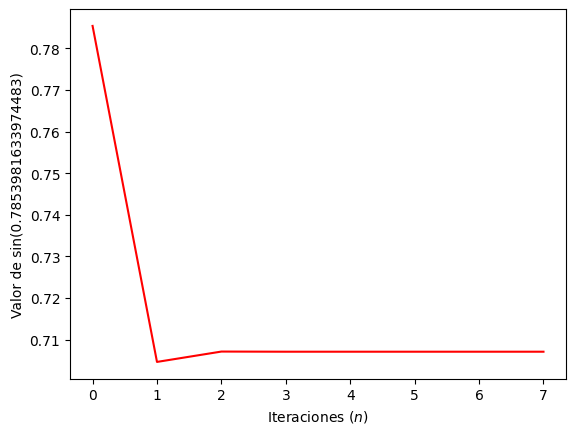

In [ ]:
grafica_serie_seno(np.pi/4,epsilon,150) #Dado que converge tan rapido, la grafica es... decepcionante (pero totalmente consecuente)

In [ ]:
#Sigamos con...! Logaritmos!
def serielog(x,tol,maxiter): #El funcionamiento es netamente analogo; mismos ciclos, misma idea
  log=0
  for i in range(1,maxiter): #Esta vez empieza en 1!
    log+= (((-1)**(i-1))/i)*x**i
    if abs(np.log(1+x) - log)<tol:
      return log
  return print(f"Maximas iteraciones alcanzadas, el valor podría estar al rededor de {log}")

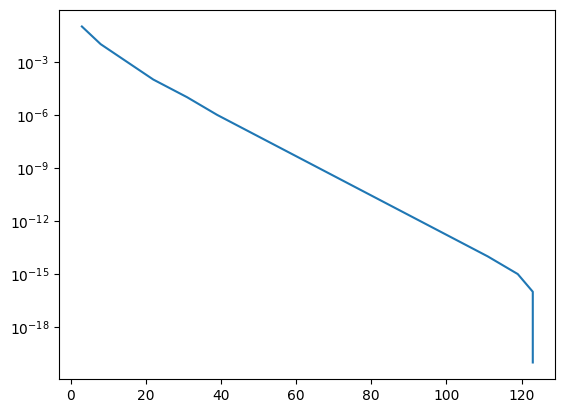

In [ ]:
#Hagamos el mismo truco para observar su comportamiento variando la convergencia.

def serielogtol(x,tol):
  log=0
  i=1   #La serie debe empezar en 1
  while True:
    log+= (((-1)**(i-1))/i)*x**i
    i+=1
    if abs(np.log(1+x) - log)<tol:
      break
  return i-1   #Por lo cual, al final, eliminamos esa iteracion fantasma




tolerancia = np.logspace(-1, -20, 20) #Nuestro eje y.
ejex2=[]

for m in tolerancia:
  ejex2.append(serielogtol(np.pi/4,m))

plt.plot(ejex2,tolerancia)
plt.yscale("log")

In [ ]:
#A diferencia de la serie del Seno, vemos un comportamiento mas lineal.
#A su vez... Observe esa cantidad de iteraciones!!! Aunque eficiente, es notablemente inferior en velocidad de convergencia.
#Concluimos que no converge con tanta velocidad como lo hacía el Seno.
#Como curiosidad, se puso una precisión mas allà del epsilon, como podemos observar, todos los valores en adelante, son Epsilon.

In [ ]:
 #Realizamos el mismo proceso, para ver el error relativo en funcion a las iteraciones!
def serielog2(x,tol,maxiter): #
  log=0
  for i in range(1,maxiter):
    log+= (((-1)**(i-1))/i)*x**i
    if abs(np.log(1+x) - log)<tol:
      return log
  return log                              #Igual que antes, llegue o no a la tolerancia, obtendremos su valor aproximado

def error_log(f,x,maxiter): #y ahora, el codigo de error!
  relativo=abs(f(x,epsilon,maxiter)-np.log(x+1))/np.log(x+1)  #Por defecto, con precision maxima...
  porcentual=relativo*100
  return print(f"El error relativo con {maxiter} iteracion(es) es de {relativo}, por lo cual el error porcentual es {porcentual}%")

In [ ]:
error_log(serielog2,np.pi/4,2) #No es comparable al seno, verdad...?
error_log(serielog2,np.pi/4,10)    #Ya estamos menor al 1%...
error_log(serielog2,np.pi/4,50)     #No es que sea mala, ni lenta! funciona bien, solo que el seno es demasiado rapido!
error_log(serielog2,np.pi/4,124)     #Hasta que finalmente alcanzamos el epsilon de la maquina...

El error relativo con 2 iteracion(es) es de 0.354972391861377, por lo cual el error porcentual es 35.497239186137705%
El error relativo con 10 iteracion(es) es de 0.009003239138271014, por lo cual el error porcentual es 0.9003239138271014%
El error relativo con 50 iteracion(es) es de 1.1077045556111535e-07, por lo cual el error porcentual es 1.1077045556111535e-05%
El error relativo con 124 iteracion(es) es de 0.0, por lo cual el error porcentual es 0.0%


In [ ]:
# A graficar!!!!
def grafica_serie_log(x,tol,maxiter): #Nuevamente, codigo analogo.
  logaprox=[]     #Aqui meteremos la evolucion de la serie para la gráfica
  iteracioness=[]  #Y aqui las iteraciones
  log=0
  for i in range(1,maxiter):                   #misma funcion...
    log+= (((-1)**(i-1))/i)*x**i
    logaprox.append(log)                   #Guardamos cada valor del seno
    iteracioness.append(i)
    if abs(np.log(x+1)-log)<tol:
      return plt.plot(iteracioness,logaprox,color="c"), plt.xlabel("Iteraciones ($n$)"), plt.ylabel(f"Valor de ln(1+{x})"),plt.axhline(np.log(1+x),color="red",linestyle="--",lw=0.99)
  return print(f"Máximas iteraciones alcanzadas! Ingrese un valor mayor para visualizar el comportamiento")                 #Esta linea horizontal simplemente señala el valor al cual debe convergir

([<matplotlib.lines.Line2D at 0x7acdf8d29950>],
 Text(0.5, 0, 'Iteraciones ($n$)'),
 Text(0, 0.5, 'Valor de ln(1+0.7853981633974483)'),
 <matplotlib.lines.Line2D at 0x7acdf8d1f710>)

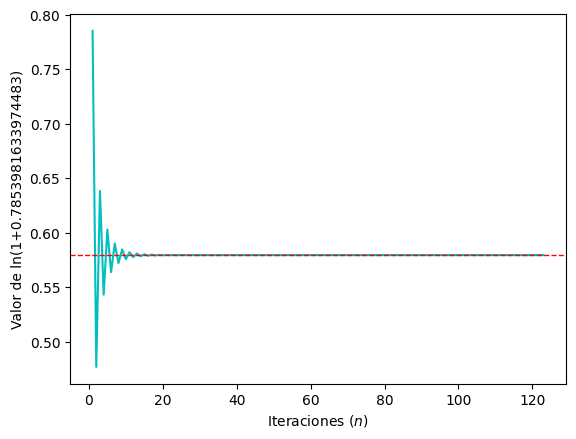

In [ ]:
grafica_serie_log(np.pi/4,epsilon,150) #Nada mal! podemos observar sus fluctuaciones!

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



In [ ]:
#Comencemos entonces con (Taylor)**1/2!
#Este señor no parece ser tan... funcional como de costumbre, es decir, formularlo per se como función!

#Ideas...? Yessir! trabajar con la clasica experiencia... a mano! (aunque sea virtual!)

#A) empezemos con unos cuantos valores, para ver como se va comportando nuestra funcion
a=1/2            #El alpha...
x=0.5            #Y la x, en este caso, 0.5
k=(1.5)**(1/2)   #Tengamozlo siempre a mano, para comparar

#Y ahora... nuestros muchisimos valores!

taylor3= 1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2
taylor5= 1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4
taylor7= 1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4 + ((a*(a-1)*(a-2)*(a-3)*(a-4))/(math.factorial(5)))*x**5 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5))/(math.factorial(6)))*x**6
taylor10= taylor7 +((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6))/(math.factorial(7)))*x**7 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6)*(a-7))/(math.factorial(8)))*x**8 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6)*(a-7)*(a-8))/(math.factorial(9)))*x**9
taylor13= taylor10 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6)*(a-7)*(a-8)*(a-9))/(math.factorial(10)))*x**10 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6)*(a-7)*(a-8)*(a-9)*(a-10))/(math.factorial(11)))*x**11 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6)*(a-7)*(a-8)*(a-9)*(a-10)*(a-11))/(math.factorial(12)))*x**12

In [ ]:
#Empleemos este grupo de aproximaciones para observar el comportamiento de la convergencia.
print(f"El error absoluto de la serie con 3 iteraciones es {abs(taylor3-k)}, y su error porcentual es {(abs(taylor3-k)/k)*100}%")
print(f"El error absoluto de la serie con 5 iteraciones es {abs(taylor5-k)}, y su error porcentual es {(abs(taylor5-k)/k)*100}%")
print(f"El error absoluto de la serie con 7 iteraciones es {abs(taylor7-k)}, y su error porcentual es {(abs(taylor7-k)/k)*100}%")
print(f"El error absoluto de la serie con 10 iteraciones es {abs(taylor10-k)}, y su error porcentual es {(abs(taylor10-k)/k)*100}%")
print(f"El error absoluto de la serie con 13 iteraciones es {abs(taylor13-k)}, y su error porcentual es {(abs(taylor13-k)/k)*100}%")

El error absoluto de la serie con 3 iteraciones es 0.005994871391588941, y su error porcentual es 0.489479199433381%
El error absoluto de la serie con 5 iteraciones es 0.0006237776415889407, y su error porcentual es 0.05093123116165306%
El error absoluto de la serie con 7 iteraciones es 8.972002440144067e-05, y su error porcentual es 0.007325609316452847%
El error absoluto de la serie con 10 iteraciones es 6.332860654101324e-06, y su error porcentual es 0.0005170759071565455%
El error absoluto de la serie con 13 iteraciones es 5.235943478787419e-07, y su error porcentual es 4.275129948360752e-05%


In [ ]:
#wow! en estos valores, podriamos decir que su convergencia goza de una velocidad prudente. #Veamos esto en una gráfica.
it=[0,1,2,3,4,5,6,7,8,9] #Las iteraciones, digamos que haremos... 10!
y1=[1,1 + (a*x),1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2, 1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3,
    1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4,
    1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4 + ((a*(a-1)*(a-2)*(a-3)*(a-4))/(math.factorial(5)))*x**5,
    1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4 + ((a*(a-1)*(a-2)*(a-3)*(a-4))/(math.factorial(5)))*x**5 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5))/(math.factorial(6)))*x**6,
    1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4 + ((a*(a-1)*(a-2)*(a-3)*(a-4))/(math.factorial(5)))*x**5 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5))/(math.factorial(6)))*x**6 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6))/(math.factorial(7)))*x**7,
    1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4 + ((a*(a-1)*(a-2)*(a-3)*(a-4))/(math.factorial(5)))*x**5 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5))/(math.factorial(6)))*x**6 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6))/(math.factorial(7)))*x**7 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6)*(a-7))/(math.factorial(8)))*x**8,
    1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4 + ((a*(a-1)*(a-2)*(a-3)*(a-4))/(math.factorial(5)))*x**5 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5))/(math.factorial(6)))*x**6 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6))/(math.factorial(7)))*x**7 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6)*(a-7))/(math.factorial(8)))*x**8 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5)*(a-6)*(a-7)*(a-8))/(math.factorial(9)))*x**9
]

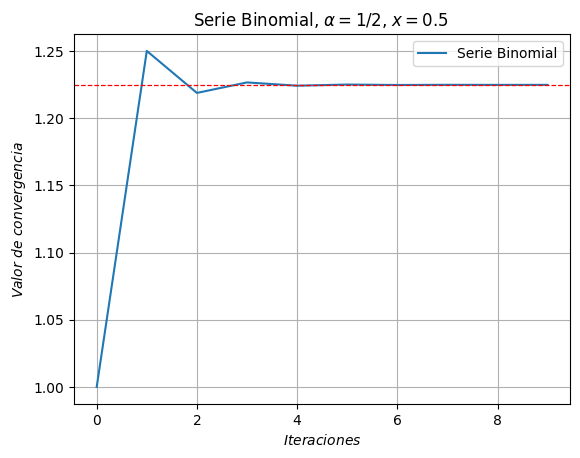

In [ ]:
fig,ax=plt.subplots()
ax.plot(it,y1,label= "Serie Binomial") #Graficamos las iteraciones vs el comportamiento
ax.axhline(k,color="red",linestyle="--",linewidth=0.9)           #El punto donde debe converger
ax.set(title="Serie Binomial, $α=1/2$, $x=0.5$ ",
xlabel="$Iteraciones$", ylabel="$Valor$ $de$ $convergencia$", #Y ya, jueguitos para que se vea mas bello!!
    )
ax.legend()
ax.grid()

In [ ]:
#Para la comparación final, usemos una tolerancia media... es decir... 1e-4. Veamos!
taylor1=1
taylor2=1 + (a*x)
taylor3=1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2
taylor4=1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3
taylor5=1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4
taylor6=1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4 + ((a*(a-1)*(a-2)*(a-3)*(a-4))/(math.factorial(5)))*x**5
taylor7=1 + (a*x) + ((a*(a-1))/(math.factorial(2)))*x**2 + ((a*(a-1)*(a-2))/(math.factorial(3)))*x**3 + ((a*(a-1)*(a-2)*(a-3))/(math.factorial(4)))*x**4 + ((a*(a-1)*(a-2)*(a-3)*(a-4))/(math.factorial(5)))*x**5 + ((a*(a-1)*(a-2)*(a-3)*(a-4)*(a-5))/(math.factorial(6)))*x**6
tol=1e-4

taylores=[taylor1,taylor2,taylor3,taylor4,taylor5,taylor6,taylor7]
for i in taylores:
  if abs(i-k)<tol:
    print(f"con {taylores.index(i)+1}, iteracion(es), la serie converge con una tolerancia {tol}")
  else:
    print(f"con {taylores.index(i)+1} iteracion(es), la serie aun no converge! a la tolerancia solicitada!")


con 1 iteracion(es), la serie aun no converge! a la tolerancia solicitada!
con 2 iteracion(es), la serie aun no converge! a la tolerancia solicitada!
con 3 iteracion(es), la serie aun no converge! a la tolerancia solicitada!
con 4 iteracion(es), la serie aun no converge! a la tolerancia solicitada!
con 5 iteracion(es), la serie aun no converge! a la tolerancia solicitada!
con 6 iteracion(es), la serie aun no converge! a la tolerancia solicitada!
con 7, iteracion(es), la serie converge con una tolerancia 0.0001


In [ ]:
#Finalmente, para graficar, requerimos de una funcion, para compararla con su tolerancia!

def coefbinomial(n,a):       #Hacemos primero una funcion,para el coeficiente
  coef = 1
  numerador=1
  denominador=1
  for i in range(n):             #El rango será el valor maximo dado
    numerador*=(a-i)                #el numerador
    denominador=(math.factorial(i+1))    #y este es el denominador
    coef=numerador/denominador
  return coef

In [ ]:
def binomial(x,a,tol): #Va a recibir la variable, el alpha, y la tolerancia
  valor=0              #Aqui metemos nuestro valor
  iteraciones=0                  #Aqui guardaremos las iteraciones

  while True:
    valor+=coefbinomial(iteraciones,a)*(x**iteraciones)    #Metemos muestra funcion anterior de coeficientes
    iteraciones+=1

    if abs(valor-((1.5)**(1/2)))<tol:                 #Y comparamos, para, al llegar, romper
      break
    else:
      continue
  return valor, iteraciones                           #Voilà!

In [ ]:
#Hagamos una comparacion con el codigo, y con la version manual!
print(binomial(0.5,0.5,1e-4))
print(taylor7)                 #Efectivamente, son equivalentes

(1.2246551513671875, 7)
1.2246551513671875


In [ ]:
#Ahora bien, grafiquemos iteraciones vs tol!
#primero, editamos nuestro codigo anterior, solamente en el return, para que nos devuelva unicamente las iteraciones en la tol.

def binomialiteraciones(x,a,tol):
  valor=0
  iteraciones=0

  while True:
    valor+=coefbinomial(iteraciones,a)*(x**iteraciones)
    iteraciones+=1

    if abs(valor-((1.5)**(1/2)))<tol:
      break
    else:
      continue
  return iteraciones            #da las iteraciones


#Ahora, creamos nuestros ejes!
xbi=[]
Tolerancias=[1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]
for i in Tolerancias:
  xbi.append(binomialiteraciones(0.5,1/2,i))

[Text(0.5, 1.0, 'Iteraciones vs Tolerancia'),
 Text(0.5, 0, '$iteraciones$'),
 Text(0, 0.5, '$Tolerancia$ $ (Escala Logarítmica)$')]

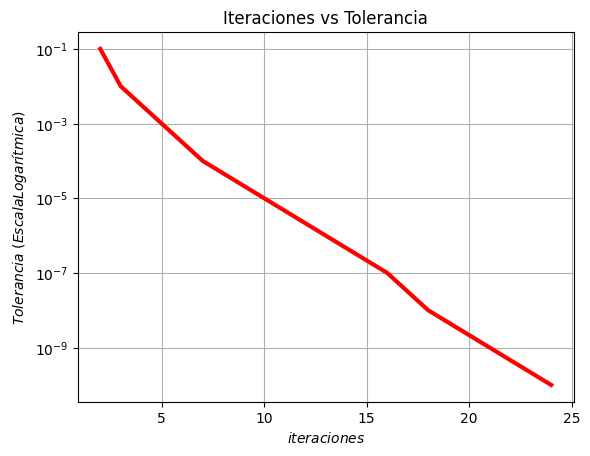

In [ ]:
fig,ax=plt.subplots()
ax.plot(xbi,Tolerancias, linewidth=(3),color="r")
plt.yscale("log")                          #Dado que tenemos valores muy pequeños, esto nos permite una mejor visualización de la tolerancia
plt.grid()
ax.set(
    title= "Iteraciones vs Tolerancia",
    xlabel="$iteraciones$",
    ylabel="$Tolerancia$ $ (Escala Logarítmica)$"
)